In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [4]:
print(f'There are {len(train_images)} images in the training set and {len(test_images)} images in the test data.')
print(f'There are {len(train_labels)} labels in the training set and {len(test_labels)} labels in the test data.')
print(f'There are {train_images[0][0].size} x {train_images[0][1].size} Numpy arrays')

There are 60000 images in the training set and 10000 images in the test data.
There are 60000 labels in the training set and 10000 labels in the test data.
There are 28 x 28 Numpy arrays


In [6]:
# Images are related to integers from 0-9
train_labels[0:20]
label_cloth_dict = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover',
              3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt',
              7:'Sneaker', 8:'Bag' ,9:'Ankle Boot'}

In [7]:
def label_name(x):
    return label_cloth_dict[x]

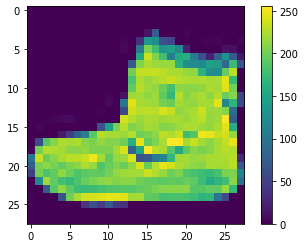

In [8]:
# Images
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

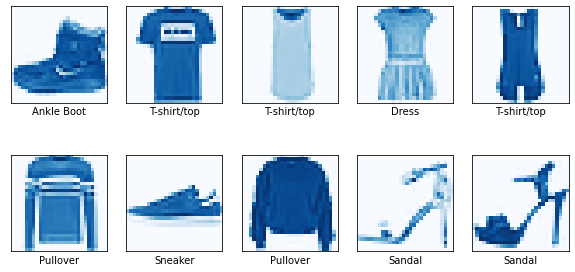

In [15]:
# Lets look at 10 images with labels
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='Blues')
    plt.xlabel(label_name(train_labels[i]))
plt.show()

In [17]:
# The pixel range is from 0 to 255
# Scaling the values from 0 to 1
train_images = train_images / 255
test_images = test_images / 255

In [18]:
# Let's build the model
simple_model = keras.Sequential([
    # Flatten two dimensional images into one dimension 28*28pixels = 784
    keras.layers.Flatten(input_shape=(28,28)),
    # First layer: 128 nodes
    keras.layers.Dense(128, activation='relu'),
    # Final layer for 10 labels
    keras.layers.Dense(10)
])

In [19]:
# Compile the model
# Define loss function, loss and optimizer
# we use from_logits=True because we haven't used the softmax function so the output is not normalized
simple_model.compile(optimizer='adam', 
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                     metrics=['accuracy'])

In [20]:
# Let's train 15 epochs.
simple_model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4975 - accuracy: 0.8241
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3763 - accuracy: 0.8635
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3340 - accuracy: 0.8792
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3121 - accuracy: 0.8853
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2945 - accuracy: 0.8921
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2799 - accuracy: 0.8953
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2682 - accuracy: 0.9003
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2564 - accuracy: 0.9042
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2476 - accuracy: 0.9076
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

In [21]:
# Let's see how the model performs on the test data
test_loss, test_acc = simple_model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 1ms/step - loss: 0.3470 - accuracy: 0.8835
